<a href="https://colab.research.google.com/github/Minseo-202103621/machinelearning_deeplearning/blob/main/CH04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법
## 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배운다.
---
## 점진적인 학습
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련할 수 있게 된다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 생선을 까먹을 일도 없다. 이런 식의 훈련 방식을 ***점진적 학습*** 또는 온라인 학습이라고 부른다.

대표적인 점진적 학습 알고리즘은 ***확률적 경사 하강법***이다.


---
## 확률적 경사 하강법
경사 하강법은 경사를 따라 내려가는 방법을 의미한다.
여기서는 가장 가파른 경사를 따라 빠르게 내려오는 것이 목표인 것이다. 하지만 안전하게 내려와야 한다. 즉 조금씩 내려오는 것도 중요하다는 소리이다.


이제 확률적이라는 말을 생각해볼거다. 경사 하강법은 전체 샘플을 사용하여 훈련하지 않는다. 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 ***확률적 경사 하강법***이다.


자세히 설명하면 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

만약 모든 샘플을 이용했는데도 산을 내려오지 못했다?? 
다시 처음부터 시작하면 된다. 훈련 세트에 모든 샘플을 다시 채워 넣고 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려오면 된다. 이렇게 만족할만한 위치에 도달할 때까지 계속 내려가면 된다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 ***에포크***라고 부른다. 일반적으로 경사 하강법은 수십,수백 번 이상 에포크를 수행한다.

만약 1개씩 말고 무작위로 몇 개의 샘플을 선택해서 경사를 따라 내려가면...가능하다. 이런 방법을 ***미니배치 경사 하강법***이라고 한다.

극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 ***배치 경사 하강법***이라고 부른다.





* 근데 어디서 내려가야 하는 거에요?? 이 산이 무슨 산인데여??

---
## 손실함수

손실함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 

그렇기 때문에 손실 함수의 값이 작을수록 좋다. 하지만 어떤 값이 최솟값인지는 알지 못한다.

가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 

이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을거 같다.

* 비용 함수(cost function)은 손실함수의 다른 말이다. 굳이 구분하자면 손실함수는 샘플 하나에 대한 손실을 정의하지만 비용함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합이다. 하지만 보통 이 둘을 엄격히 구분 안하고 섞어서 사용한다.

분류에서 손실은 아주 확실하다. 바로 정답을 못 맞추는 거다.
그렇다면 정확도가 나올텐데 이 정확도를 손실 함수로 쓸 수 있지 않나?
정확도 값에 음수를 취하면 값이 작을수록 정확도가 올라가는 뜻이니까 맞지 않나??

응 안된다!

정확도는 일단 듬성듬성이다. 만약 4개의 샘플이라면 정확도는 0,0.25,0.5,0.75,1뿐인데 너무 듬성듬성하다 이러면 조금씩 내려올 수가 없다. 산의 경사면은 연속적이어야 한다. 즉 기술적으로 손실 함수는 ***미분 가능***해야 한다.

--- 
## 로지스틱 손실 함수

샘플 4개의 예측 확률을 각각 0.9,0.3,0.2,0.8이라고 가정해 보겠다.첫 번째와 두 번째는 타깃이 1이고 나머지 둘은 0이다.

첫 번쨰 샘플의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다. 이 경우 예측이 1과 가까울수록 좋은 모델이다. 예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다. 이 값을 손실 함수로 사용해도 괜찮겠다.

두 번째 샘플의 예측은 0.3이다. 타깃이 양성 클래스(1)인데 거리가 멀다. 위에서와 마찬가지로 예측과 타깃을 곱해 음수로 바꿔 보자. 이 값은 -0.3이기 떄문에 첫 번째 샘플보다 높은 손실이 된다.

세 번째 샘플을 보자. 이 샘플의 타깃은 음성 클래스라 0이다. 이 값을 예측 확률이 0.2와 그대로 곱하면 무조건 0이다. 한 가지 방법은 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 거다. 대신 예측값도 양성 클래스에 대한 예측으로 바꾼다. 즉 1-0.2 = 0.8을 사용한다. 

네 번쨰 샘플의 손실이 높다.

예측 확률을 사용해 이런 방식으로 계산하면 연속적인 손실 함수를 얻을 수 있다. 여기에서 예측 확률에 로그 함수를 적용하면 더 좋다. 예측 확률의 범위는 0~1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. 손실이 양수가 되면 이해하기 더 쉽다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.


### 이렇게 멋지게 정의한 손실 함수를 ***로지스틱 손실 함수***라고 부른다. 또는 ***이진 크로스엔트로피 손실 함수***라고 부른다.

* 이진 분류는 로지스틱 손실 함수를 사용하고 다중 분류는 크로스엔트로피 손실 함수를 사용한다.

* 회귀에서는 손실함수로 평균 절대값 오차를 사용할 수 있다. 또는 평균 제곱 오차를 많이 사용한다.

---
## SGDClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


* 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier이다. sklearn.linear_model 패키지 아래에서 임포트해 보겠다.

In [ ]:
from sklearn.linear_model import SGDClassifier

* SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정한다. loss는 손실 함수의 종류를 지정한다. 여기에서는 loss='log'로 지정하여 로지스틱 손실 함수를 지정한다. max_iter는 수행할 에포크 횟수를 지정한다. 10으로 지정하여 전체 훈련 세트를 10회 반복한다. 그다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력한다.

* 다중 분류일 경우 SGDClassifier에 loss='log'로 지정하면 클래스마다 이진 분류 모델을 만든다. 즉 도미는 양성 클래스로 두고 나머지를 모두 음성 클래스로 둔다. 이런 방식을 OvR이라고 부른다.

In [ ]:
sc = SGDClassifier(loss='log',max_iter = 10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


* 앞서 말한 것처럼 확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해 보자. 
* 모델을 이어서 훈련할 때는 partial_fit()메서드를 사용한다.
* 이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1에포크씩 이어서 훈련할 수 있다.partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 보자.

In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


* 여전히 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상됐다. 그런데 그럼 얼마나 더 훈련해야 해요??????????

---
# 에포크와 과대/과소적합

에포크 횟수가 적으면 ? 모델이 훈련 세트를 덜 학습한다. 즉 산을 다 내려오지 못 하고 훈련을 마치는 셈이다. 에포크 횟수가 충분히 많으면 ? 훈련 세트를 완전히 학습한 것이다. 훈련세트에 아주 잘 맞는 모델이 만들어진거다.

적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다. 반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.

과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료라고 한다. 이 부분은 그래프를 그려 확인할 수 있고 그 그래프를 그려 보겠다.

* 이 예제에서는 fit()메서드를 사용하지 않고 partial_fit() 메서드만 사용하겠다.
* partial_fit()메서드만 사용하려면 하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 한다. 
* 이를 위해 np.unique() 함수로 train_target에 있는 7개의 생선의 목록을 만든다. 또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

* 300번의 에포크 동안 훈련을 반복하여 진행해 보겠다. 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score,test_score 리스트에 추가한다.

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes = classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))
  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


* 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려 보겠다.

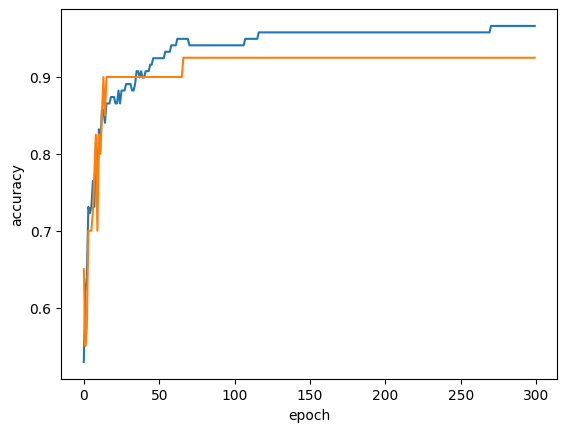

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* 데이터가 작기 때문에 아주 잘 드러나지는 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다. 이 모델은 백 번째 에포크가 적절한 반복 횟수같다.
* SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 보겠다. 

In [ ]:
sc = SGDClassifier(loss='log',max_iter = 100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [ ]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


* SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동을 멈춘다. 
* tol 매개변수에서 향상될 최솟값을 지정한다. 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 했다.

---
 + loss 매개변수의 기본값은 'hinge이다. ***힌지 손실***은 ***서포트 벡터 머신***이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.
 + 이처럼 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다는 것만 기억하면 된다.

In [ ]:
sc = SGDClassifier(loss='hinge',max_iter = 100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
